In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=80)

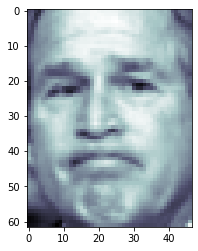

In [3]:
plt.imshow(faces.images[0],cmap ='bone')

In [5]:
faces.images[0].shape

(62, 47)

In [6]:
62*47

2914

In [7]:
X = faces.data.T
X.shape

(2914, 1140)

In [8]:
m = X.mean(axis=1)[:,np.newaxis]
m.shape

(2914, 1)

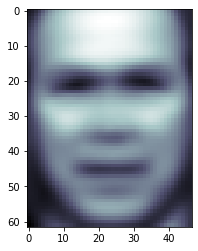

In [9]:
plt.imshow(m.reshape((62,47)),cmap ='bone')

In [10]:
Xc = X-m
C = Xc.dot(Xc.T)

In [11]:
C.shape

(2914, 2914)

In [12]:
e,W = LA.eig(C)

In [13]:
idx = np.argsort(e)[::-1]
e = e[idx]
W = W[:,idx]

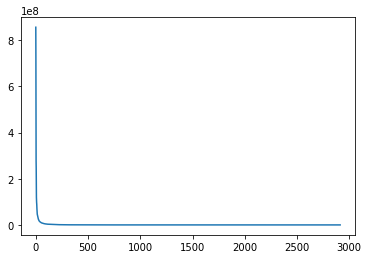

In [14]:
plt.plot(np.arange(len(e)),e)

In [34]:
k = 500
W_k = W[:,0:k]

In [35]:
W_k.shape

(2914, 500)

In [36]:
Y = W_k.T.dot(Xc)

In [37]:
Y.shape

(500, 1140)

In [38]:
Xc_r = W_k.dot(Y)

In [39]:
Xc_r.shape

(2914, 1140)

In [40]:
X_r = Xc_r + m

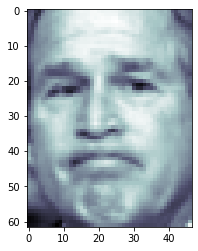

In [41]:
plt.imshow(X[:,0].reshape((62,47)),cmap = 'bone')

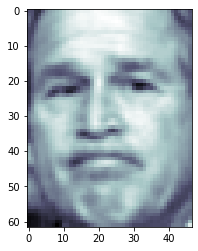

In [42]:
plt.imshow(X_r[:,0].reshape((62,47)),cmap = 'bone')

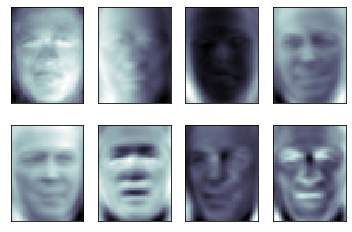

In [44]:
fig,ax = plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(W_k[:,idx].reshape((62,47)),cmap = 'bone')
    axidx.set(xticks=[],yticks=[])